In [1]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image

In [2]:
%matplotlib inline

In [3]:
dataset_path = 'CroppedYale/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

In [4]:
import random

random.seed(0)
  
# declaring list
list = [2, 2, 4, 6, 6, 8]
  
# initializing the value of n
n = 4
  
# printing n elements from list
print(random.sample(list, n))

[6, 8, 2, 2]


In [5]:
dirs = os.listdir('CroppedYale/')

testing_pics = []
training_pics = []

for i in dirs:
    print(i)
    
    pics = os.listdir('CroppedYale/'+i)
    testing_mojo = random.sample(range(len(pics)), int(0.1*len(pics)))
    
    for j in testing_mojo:
        testing_pics.append('CroppedYale/'+i+'/'+pics[j])
    
    training_pics = training_pics + [f'CroppedYale/{i}/{pics[ii]}' for ii in range(len(pics)) if ii not in testing_mojo]
        
training_pics = [i for i in training_pics if '.pgm' in i]   
testing_pics = [i for i in testing_pics if '.pgm' in i]   

testing_pics = np.array(testing_pics)
training_pics = np.array(training_pics)

yaleB34
yaleB21
yaleB16
yaleB05
yaleB11
yaleB17
yaleB35
yaleB18
yaleB33
yaleB13
yaleB25
yaleB15
yaleB02
yaleB28
yaleB26
yaleB06
yaleB08
yaleB07
yaleB09
yaleB32
yaleB39
yaleB31
yaleB30
yaleB20
yaleB19
yaleB04
yaleB27
yaleB38
yaleB22
yaleB29
yaleB01
yaleB37
yaleB03
yaleB36
yaleB12
yaleB23
yaleB24
yaleB10


In [6]:
training_pics_address = training_pics
testing_pics_address = testing_pics

def load_images():
    im_size=(64,64)
    training_im = []
    testing_im = []
    training_label = []
    testing_label = []
    
    for i in training_pics_address:
        im_a = np.array(Image.open(i),'uint8')
        im_a = cv2.resize(im_a, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
        training_im.append(im_a)
        gg = i.split('/')
        gg = gg[1]
        training_label.append(gg)
        
    for i in testing_pics_address:
        im_a = np.array(Image.open(i),'uint8')
        im_a = cv2.resize(im_a, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
        testing_im.append(im_a)
        gg = i.split('/')
        gg = gg[1]
        testing_label.append(gg)
    
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
training_im, training_label, testing_im, testing_label = load_images()

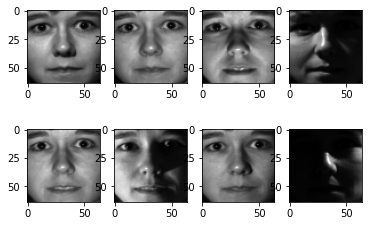

In [7]:
training_tensor = np.ndarray(shape=(len(training_pics_address), 64*64), dtype=np.float64)

for i in range(len(training_im)):
    training_tensor[i,:] = np.array(training_im[i], dtype='float64').flatten()
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

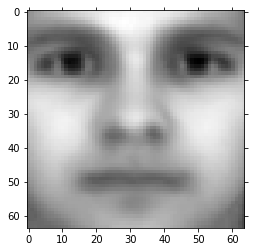

In [8]:
mean_face = np.zeros((1,64*64))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_pics_address))).flatten()

plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [9]:
height = 64
width = 64

normalised_training_tensor = np.ndarray(shape=(len(training_pics_address), height*width))

for i in range(len(training_pics_address)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

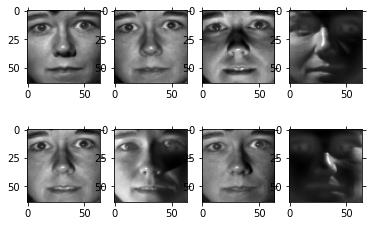

In [10]:
plt.clf()
for i in range(len(training_pics_address)):
    img = normalised_training_tensor[i].reshape(height,width)
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# EIGENVECTORS AND VALUES USING SVD

In [11]:
len(training_pics_address)
!ls CroppedYale

yaleB01  yaleB06  yaleB11  yaleB17  yaleB22  yaleB27  yaleB32  yaleB37
yaleB02  yaleB07  yaleB12  yaleB18  yaleB23  yaleB28  yaleB33  yaleB38
yaleB03  yaleB08  yaleB13  yaleB19  yaleB24  yaleB29  yaleB34  yaleB39
yaleB04  yaleB09  yaleB15  yaleB20  yaleB25  yaleB30  yaleB35
yaleB05  yaleB10  yaleB16  yaleB21  yaleB26  yaleB31  yaleB36


In [12]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,len(training_pics_address))
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(2249, 2249)
Covariance matrix of X: 
[[ 0.55328715  0.31686899  0.05353183 ... -0.13018345  0.31317375
  -0.5601744 ]
 [ 0.31686899  0.35304617  0.26063108 ... -0.37102752  0.08397414
  -0.15251467]
 [ 0.05353183  0.26063108  0.55585102 ... -0.11530477  0.05340825
   0.01350928]
 ...
 [-0.13018345 -0.37102752 -0.11530477 ...  2.27928504  0.53281121
  -0.6479243 ]
 [ 0.31317375  0.08397414  0.05340825 ...  0.53281121  0.90698287
  -1.14299075]
 [-0.5601744  -0.15251467  0.01350928 ... -0.6479243  -1.14299075
   2.59932969]]


In [13]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.00643575  0.02375571  0.00713636 ... -0.01708875  0.00134068
  -0.01883117]
 [ 0.00202259  0.01979396 -0.01135059 ... -0.00269288  0.00341273
  -0.01840834]
 [ 0.00090971  0.00521468 -0.04059911 ...  0.00920764  0.01343362
  -0.04846993]
 ...
 [-0.02804771 -0.04655018 -0.00197022 ...  0.01459433 -0.00076182
  -0.00277221]
 [-0.02155271  0.02136861 -0.01120842 ...  0.0067921   0.02026822
   0.02290536]
 [ 0.03130724 -0.04934391 -0.00052564 ...  0.00712848 -0.00203571
   0.00099479]]

Eigenvalues of Cov(X): 
[1.26303274e+03 2.95997291e+02 1.46288423e+02 ... 1.66944437e-04
 1.66497372e-04 1.65046599e-04]


In [14]:
eigenvectors.shape

(2249, 2249)

In [15]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.51044973 0.63007588 0.68919777 ... 1.         1.         1.        ]


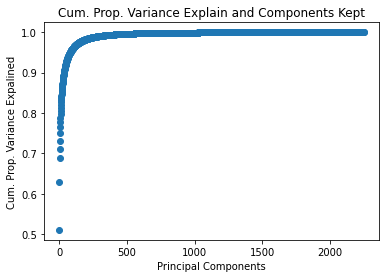

In [16]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [17]:
reduced_data = np.array(eigvectors_sort[:8]).transpose()

In [18]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

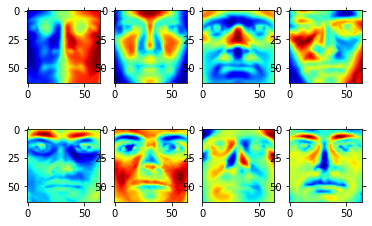

In [19]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    if i < 8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='jet')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [20]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

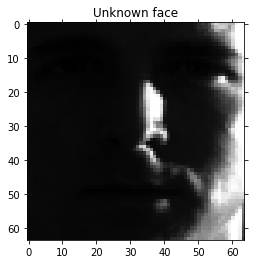

In [21]:
unknown_face        = testing_im[-1]
# unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

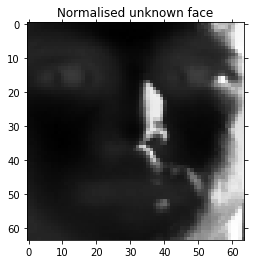

In [22]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [23]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ 2.76045394e+08,  8.40162465e+07, -3.38016439e+07,  2.92681742e+07,
       -5.71944274e+06,  1.23598851e+08,  3.90265374e+07,  5.14151021e+07])

In [24]:
diff = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)

[3.78366135e+08 3.12262625e+08 2.88843669e+08 ... 6.96904115e+08
 5.44670444e+08 3.52362793e+08]


In [25]:
w.shape

(2249, 8)

In [30]:
correct_pred = 0
def recogniser(curr_testing_im, curr_testing_label, proj_data, w):
    global count, num_images, correct_pred
    unknown_face_vector = np.array(curr_testing_im, dtype='float64').flatten()
    normalised_uface_vector = unknown_face_vector-mean_face
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    t0 = 88831687
    
    if norms[index] < t1 or True:
#         print

        if norms[index] < t0 or True: # It's a face
            print("=====================")
            print(curr_testing_label)
            print(training_label[index])
            print("=====================")
            if curr_testing_label == training_label[index]:
#                 plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
#             else:
#                 plt.title('Matched:'+'.'.join(training_label[index]), color='g')
#                 plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
#                 plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
#         else:
#             if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
#                 plt.title('Unknown face!', color='g')
#                 correct_pred += 1
#             else:
#                 plt.title('Unknown face!', color='r')
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
#         plt.subplots_adjust(right=1.2, top=2.5)
    
#     else:     
# #         plt.subplot(9,4,1+count)
# #         if len(img.split('.')) == 3:
#             pass
# #             plt.title('Not a face!', color='r')
#         else:
# #             plt.title('Not a face!', color='g')
#             correct_pred += 1
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    

# fig = plt.figure(figsize=(15, 15))
for idx, curr_testing_im in enumerate(testing_im):
    recogniser(curr_testing_im, testing_label[idx], proj_data, w)

# plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))

yaleB34
yaleB05
yaleB34
yaleB03
yaleB34
yaleB07
yaleB34
yaleB29
yaleB34
yaleB27
yaleB34
yaleB12
yaleB21
yaleB11
yaleB21
yaleB24
yaleB21
yaleB34
yaleB21
yaleB05
yaleB21
yaleB27
yaleB16
yaleB16
yaleB16
yaleB34
yaleB16
yaleB25
yaleB16
yaleB10
yaleB16
yaleB19
yaleB16
yaleB28
yaleB05
yaleB36
yaleB05
yaleB33
yaleB05
yaleB37
yaleB05
yaleB34
yaleB05
yaleB05
yaleB05
yaleB02
yaleB11
yaleB09
yaleB11
yaleB06
yaleB11
yaleB36
yaleB11
yaleB19
yaleB11
yaleB06
yaleB11
yaleB01
yaleB17
yaleB06
yaleB17
yaleB31
yaleB17
yaleB34
yaleB17
yaleB06
yaleB17
yaleB04
yaleB17
yaleB15
yaleB35
yaleB17
yaleB35
yaleB08
yaleB35
yaleB38
yaleB35
yaleB37
yaleB35
yaleB26
yaleB18
yaleB31
yaleB18
yaleB27
yaleB18
yaleB24
yaleB18
yaleB07
yaleB18
yaleB11
yaleB18
yaleB30
yaleB33
yaleB39
yaleB33
yaleB30
yaleB33
yaleB18
yaleB33
yaleB34
yaleB33
yaleB19
yaleB33
yaleB09
yaleB13
yaleB13
yaleB13
yaleB29
yaleB13
yaleB13
yaleB13
yaleB16
yaleB13
yaleB06
yaleB13
yaleB33
yaleB25
yaleB03
yaleB25
yaleB20
yaleB25
yaleB20
yaleB25
yaleB26
yaleB25
